In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error


In [2]:
import quandl

# Setting API key
quandl.ApiConfig.api_key = '#################'

# Example: Fetching data for four stocks
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
data = {stock: quandl.get(f'WIKI/{stock}') for stock in stocks}



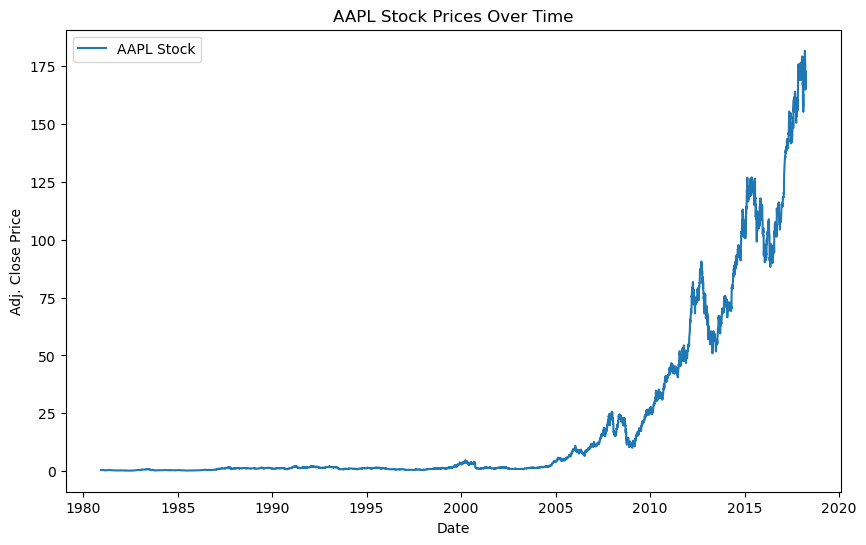

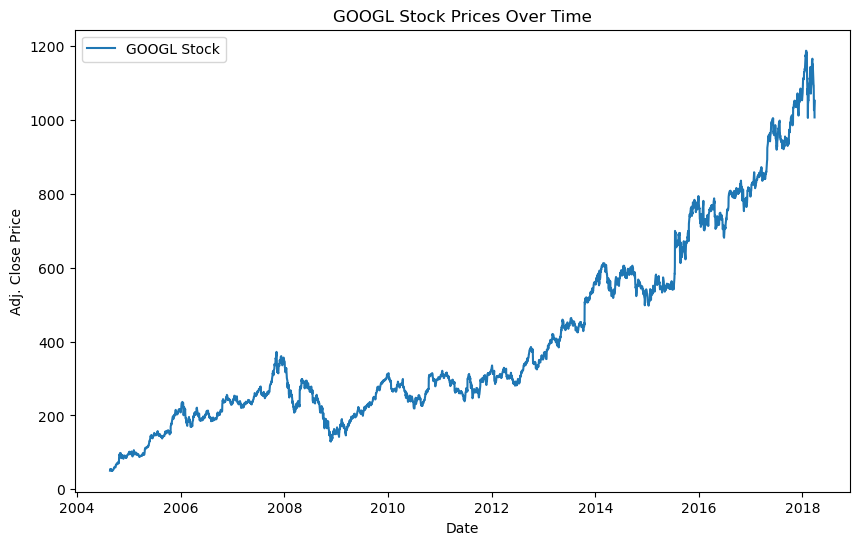

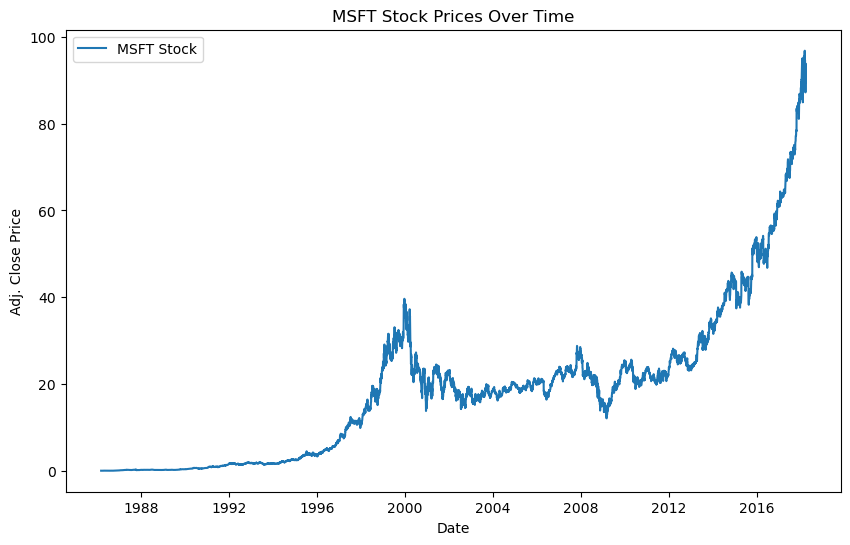

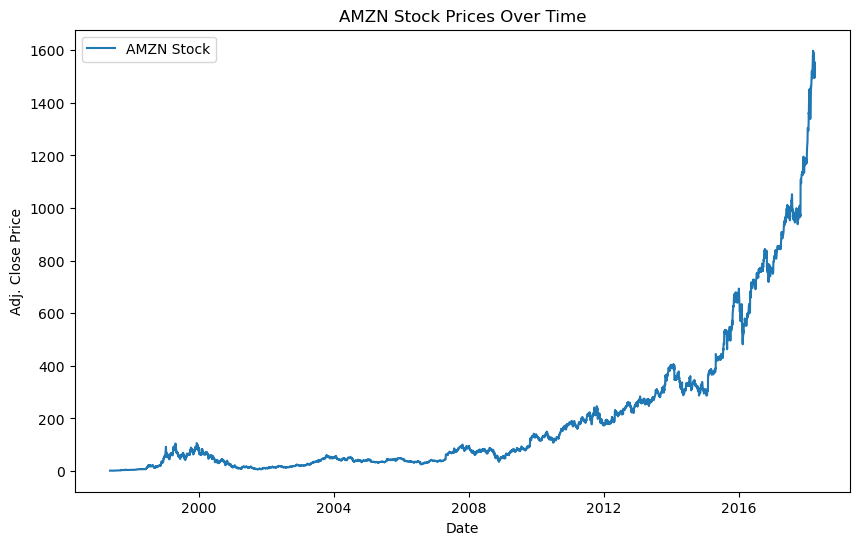

In [3]:
for stock, df in data.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Adj. Close'], label=f'{stock} Stock')
    plt.title(f'{stock} Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Adj. Close Price')
    plt.legend()
    plt.show()



In [4]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,1586.45,1590.00,1563.17,1581.86,4667291.0,0.0,1.0,1586.450000,1590.000000,1563.170000,1581.860000,4667291.0
2018-03-22,1565.47,1573.85,1542.40,1544.10,6177737.0,0.0,1.0,1565.470000,1573.850000,1542.400000,1544.100000,6177737.0
2018-03-23,1539.01,1549.02,1495.36,1495.56,7843966.0,0.0,1.0,1539.010000,1549.020000,1495.360000,1495.560000,7843966.0


In [7]:
for stock, df in data.items():
    # Modelling the 'Adj. Close' prices
    train_size = int(len(df) * 0.8)
    train, test = df['Adj. Close'][:train_size], df['Adj. Close'][train_size:]

    # ARIMA model
    model_arima = ARIMA(train, order=(5, 1, 5))
    results_arima = model_arima.fit()

    # Fitting SARIMA model
    model_sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results_sarima = model_sarima.fit()

    # Forecasting future values
    forecast_steps = len(test)
    forecast_arima = results_arima.predict(start=len(train), end=len(train) + forecast_steps - 1, typ='levels')
    forecast_sarima = results_sarima.predict(start=len(train), end=len(train) + forecast_steps - 1, typ='levels')

    # Evaluating model performance
    mae_arima = mean_absolute_error(test, forecast_arima)
    mae_sarima = mean_absolute_error(test, forecast_sarima)
    
    # Print insights
    print(f'MAE for ARIMA on {stock}: {mae_arima:.2f}')
    print(f'MAE for SARIMA on {stock}: {mae_sarima:.2f}')


C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. f

MAE for ARIMA on AAPL: 56.08
MAE for SARIMA on AAPL: 43.47


C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

MAE for ARIMA on GOOGL: 295.30
MAE for SARIMA on GOOGL: 232.55


C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

MAE for ARIMA on MSFT: 21.88
MAE for SARIMA on MSFT: 19.06


C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

MAE for ARIMA on AMZN: 304.31
MAE for SARIMA on AMZN: 233.40


C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\VAIBHAV KUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
